# Car Price Prediction

#### Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./CAR_DETAILS_FROM_CAR_DEKHO.csv')

In [3]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4275,Mahindra XUV500 W8 2WD,2014,650000,218000,Diesel,Individual,Manual,Second Owner
147,Maruti Ciaz VDi Plus,2015,525000,100000,Diesel,Individual,Manual,First Owner
910,Hyundai i10 Magna,2012,229999,49824,Petrol,Dealer,Manual,First Owner
2426,Hyundai i20 Magna Optional 1.2,2013,340000,35000,Petrol,Individual,Manual,First Owner
3200,Maruti Ciaz VDi Plus SHVS,2016,701000,79991,Diesel,Dealer,Manual,First Owner
1926,Hyundai Verna VTVT 1.6 SX,2018,800000,40000,Petrol,Individual,Manual,First Owner
1078,Audi Q3 2.0 TDI Quattro Premium Plus,2015,1750000,127643,Diesel,Dealer,Automatic,First Owner
1184,Maruti Gypsy King Hard Top,2000,165000,60000,Petrol,Individual,Manual,Fourth & Above Owner
4244,Hyundai i20 1.4 Sportz,2017,680000,44000,Diesel,Dealer,Manual,First Owner
3345,Honda Amaze VX i-DTEC,2014,500000,110000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [6]:
df.name

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

###### Getting only the car brand not the model

In [7]:
df.name = df.name.apply(lambda x: x.split(' ')[0])

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Visualizing Data to get a better understanding

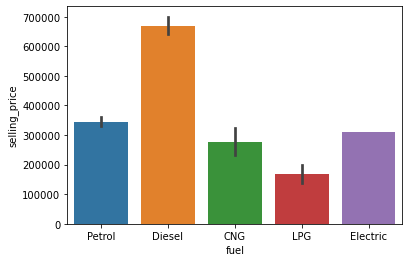

In [9]:
sns.barplot(x='fuel',y='selling_price', data=df)

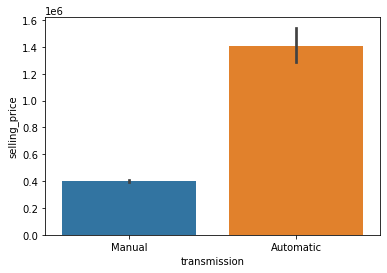

In [10]:
sns.barplot(x='transmission',y='selling_price', data=df)

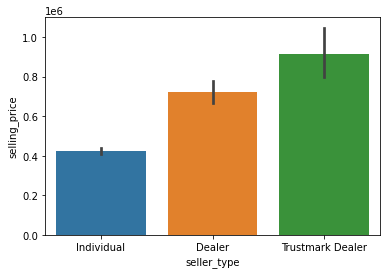

In [11]:
sns.barplot(x='seller_type',y='selling_price', data=df)

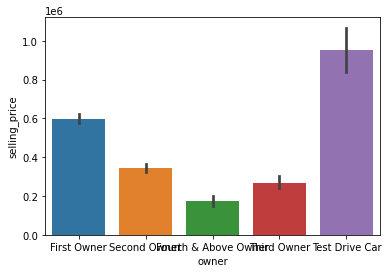

In [12]:
sns.barplot(x='owner',y='selling_price', data=df)

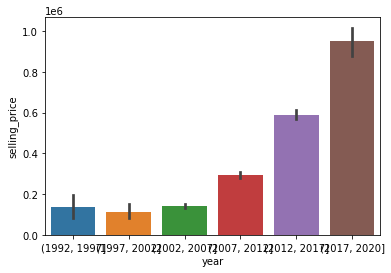

In [13]:
x = df[['selling_price','year']]
bins= [1992,1997,2002,2007,2012,2017,2020]
x.year = pd.cut(x=x.year, bins = bins)
sns.barplot(x='year',y='selling_price', data=x)

#### Encoding Data from Object dtype into Numerical dtype

In [14]:
label_encoder = LabelEncoder()

df.fuel = label_encoder.fit_transform(df.fuel)
df.seller_type = label_encoder.fit_transform(df.seller_type)
df.transmission = label_encoder.fit_transform(df.transmission)
df.name = label_encoder.fit_transform(df.name)

owner = {'Test':0, 'First':1,'Second':2,'Third':3, 'Fourth': 4}
df.owner = df.owner.apply(lambda x: owner[x.split(' ')[0]])

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,18,2007,60000,70000,4,1,1,1
1,18,2007,135000,50000,4,1,1,1
2,10,2012,600000,100000,1,1,1,1
3,5,2017,250000,46000,4,1,1,1
4,9,2014,450000,141000,1,1,1,2


#### Splitting dataset into Train Test and scaling features.

In [16]:
X = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (3472, 7)
X test:  (868, 7)
y train:  (3472,)
y test:  (868,)


In [18]:
sc = StandardScaler()
x_test = X_test
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

#### Function from which we will evaluate the model's performance

In [19]:
cv=10 # CV value

# Main function for models
def model(algorithm,X_train_,y_train_,X_test_,y_test_,):
        
    algorithm.fit(X_train_,y_train_)
    predicts=pd.DataFrame({'pred':algorithm.predict(X_test_)})
    
    R_2=r2_score(y_test_,predicts)
    
    cross_val=cross_val_score(algorithm,X_train_,y_train_,cv=cv)
    
    sp = pd.DataFrame({'selling_price':y_test_})
    sp.reset_index(inplace=True)
    
    new_df = pd.concat([predicts, sp], axis=1)
    new_df['difference'] = new_df.apply(lambda row :abs(row['selling_price']-row['pred']), axis=1)
# Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores mean:",cross_val.mean(),'\n')
    print("Standard Error: ",new_df.difference.sem(axis=0))
    
    sns.distplot(new_df.difference)

#### Decision Tree Regressor

DecisionTreeRegressor() 

r_2 score : 0.7234352243676335 

CV scores mean: 0.5820100551092752 

Standard Error:  8667.003387218505


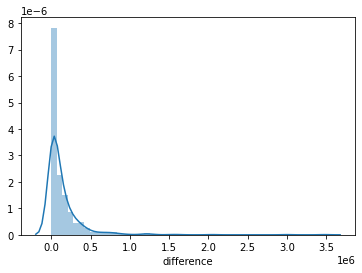

In [20]:
dtr = DecisionTreeRegressor()
model(dtr,X_train,y_train,X_test,y_test)


#### Random Forest Regressor

RandomForestRegressor(random_state=56) 

r_2 score : 0.8443806439961619 

CV scores mean: 0.736875446571472 

Standard Error:  6185.557886580575


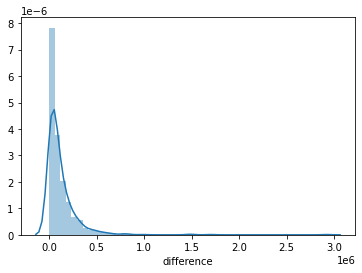

In [21]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 56)
model(rf,X_train,y_train,X_test,y_test)

#### Linear Regression

LinearRegression() 

r_2 score : 0.5106774582851301 

CV scores mean: 0.4298909366473624 

Standard Error:  10652.02170392876


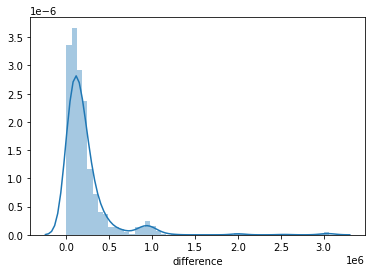

In [22]:
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

#### Lasso

Lasso(alpha=1000.0, normalize=True) 

r_2 score : 0.47373092706139297 

CV scores mean: 0.40707669703738397 

Standard Error:  11400.369058200646


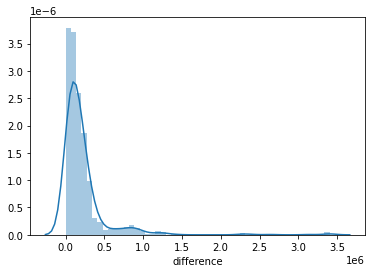

In [23]:
alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,X_train,y_train,X_test,y_test)

#### Ridge

Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.5106607085312701 

CV scores mean: 0.4303129126805577 

Standard Error:  10668.131536567415


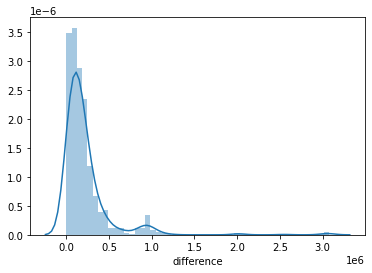

In [24]:
alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid.fit(X_train, y_train)

ridge = Ridge(alpha = 0.01, normalize = True) 
model(ridge,X_train,y_train,X_test,y_test)
